In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [2]:
cases = pd.read_csv('/Users/Sparks/Documents/Data Projects/CovidCases.csv')

In [3]:
cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,842,850,856,868,872,876,880,898,916,933
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,752,752,754,755,755,758,760,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,36,43,43,45,45,45,45,48,48,48


In [4]:
#cases = cases.drop(['Province/State'], axis=1)

cases = cases.drop(['Lat', 'Long'], axis=1)


In [5]:
cases.head(50)

test = cases['5/7/20'].groupby(cases['Country/Region'])



In [6]:
cases = cases.groupby(['Country/Region']).agg('sum')

In [133]:
cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402
Albania,0,0,0,0,0,0,0,0,0,0,...,842,850,856,868,872,876,880,898,916,933
Algeria,0,0,0,0,0,0,0,0,0,0,...,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821
Andorra,0,0,0,0,0,0,0,0,0,0,...,752,752,754,755,755,758,760,761,761,761
Angola,0,0,0,0,0,0,0,0,0,0,...,36,43,43,45,45,45,45,48,48,48


In [72]:
cases_s = cases.sort_values(by='5/16/20', ascending=False)[0:5]
cases_s

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,1257023,1283929,1309550,1329260,1347881,1369376,1390406,1417774,1442824,1467820
Russia,0,0,0,0,0,0,0,0,0,2,...,177160,187859,198676,209688,221344,232243,242271,252245,262843,272043
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,207977,212629,216525,220449,224332,227741,230985,234440,238004,241461
Brazil,0,0,0,0,0,0,0,0,0,0,...,135773,146894,156061,162699,169594,178214,190137,203165,220291,233511
Spain,0,0,0,0,0,0,0,0,0,0,...,221447,222857,223578,224350,227436,228030,228691,229540,230183,230698


In [73]:
cases_t = cases_s.transpose()
cases_t

Country/Region,US,Russia,United Kingdom,Brazil,Spain
1/22/20,1,0,0,0,0
1/23/20,1,0,0,0,0
1/24/20,2,0,0,0,0
1/25/20,2,0,0,0,0
1/26/20,5,0,0,0,0
...,...,...,...,...,...
5/12/20,1369376,232243,227741,178214,228030
5/13/20,1390406,242271,230985,190137,228691
5/14/20,1417774,252245,234440,203165,229540
5/15/20,1442824,262843,238004,220291,230183


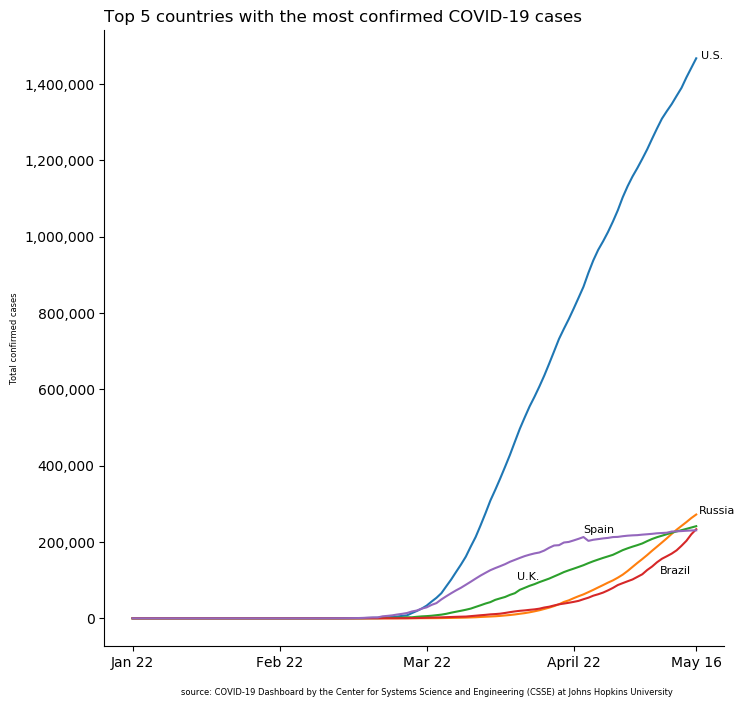

In [134]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(cases_t)
plt.title('Top 5 countries with the most confirmed COVID-19 cases', loc='left')
plt.ylabel('Total confirmed cases', fontsize=6)
plt.yticks(fontsize=10)
plt.xticks([0, 30, 60, 90, 115], ['Jan 22', 'Feb 22', 'Mar 22', 'April 22', 'May 16']
         , fontsize=10)
plt.yticks([       0.,  200000.,  400000.,  600000.,  800000.,
       1000000., 1200000., 1400000.], [ '0','200,000',  '400,000',  '600,000',  '800,000',
       '1,000,000', '1,200,000', '1,400,000']
         , fontsize=10)
plt.text(116,1465000,'U.S.', fontsize=8)
plt.text(115.5,274600,'Russia', fontsize=8)
plt.text(92,223000,'Spain', fontsize=8)
plt.text(78.5,100000,'U.K.', fontsize=8)
plt.text(107.5,117500,'Brazil', fontsize=8)
plt.text(60,-201000,'source: COVID-19 Dashboard by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University',
        fontsize=6, ha='center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
plt.savefig('/Users/Sparks/Documents/Data Projects/CovidGraph.png')
plt.show()

